LOADING DATASET

In [1]:
import pandas as pd

In [2]:
sd = pd.read_csv("Salary_Data.csv")
sd = sd.sample(frac=1).reset_index(drop=True)
sd.head()

,YearsExperience,Salary
0,3.2,64445.0
1,4.0,56957.0
2,5.9,81363.0
3,4.1,57081.0
4,5.1,66029.0


In [3]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [4]:
sd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
sd.shape

(30, 2)

PLOTTING DATA

In [6]:
import matplotlib.pyplot as plt

Text(0,0.5,'Salary')

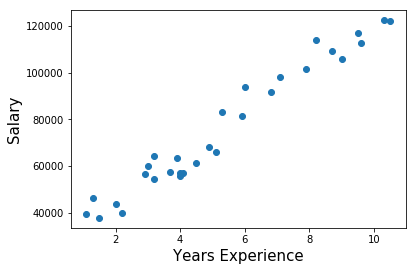

In [7]:
plt.scatter(sd["YearsExperience"],sd["Salary"])
plt.xlabel("Years Experience", fontsize=15)
plt.ylabel("Salary", fontsize=15)

DIVIDING DATA IN x AND y (Co-efficient and Intercept)

In [8]:
a = sd["YearsExperience"] #Co-efficient
b = sd["Salary"] #Intercept
print(a.head(),"\n",b.head())

0    3.2
1    4.0
2    5.9
3    4.1
4    5.1
Name: YearsExperience, dtype: float64 
 0    64445.0
1    56957.0
2    81363.0
3    57081.0
4    66029.0
Name: Salary, dtype: float64


MAKING TRAIN AND TEST SETS

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a, b, train_size=0.6, random_state=50)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
import numpy as np
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(12, 1)
(18,)
(12,)


CREATING AND FITTING VALUES IN LINEAR MODEL

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(lr.intercept_)
print(lr.coef_)

24657.703719805926
[9740.03217223]


In [53]:
y_pred = lr.predict(x_test)

VISUALISING RESULTS (ERRORS AND ACCURACY)

Text(0,0.5,'Sales')

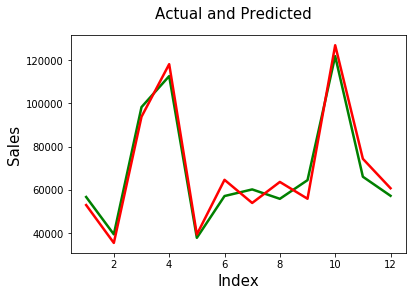

In [57]:
import matplotlib.pyplot as plt
c = [i for i in range(1,13,1)]
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual and Predicted", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Sales", fontsize=15)

Text(0,0.5,'y_test - y_pred')

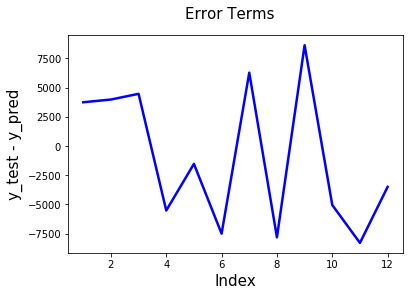

In [60]:
l = [i for i in range(1,13,1)]
fig = plt.figure()
plt.plot(l,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Index", fontsize=15)
plt.ylabel("y_test - y_pred", fontsize=15)

In [69]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Error:",mae)
print("Accuracy:",score*100)

Error: 5527.174124248587
Accuracy: 94.82655251170446


Text(0,0.5,'Predicted_y')

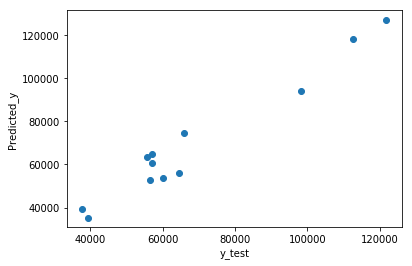

In [70]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predicted_y")